### Analyze Compressed Algorithm Trading Histories Stored in S3

In [1]:
import datetime
import boto3
import pandas as pd
import analysis_engine.consts as consts
import analysis_engine.plot_trading_history as plot_trading_history
import analysis_engine.load_history_dataset as load_history_utils

### Set Bucket and Key

You can browse for keys in Minio or find a bucket + key from the log to use this notebook for analyzing an algorithm's trading history stored in Minio (my container is hosting it at http://minio-jay:9000) in the autogenerated bucket named: **bt-spy-williamsr-2018-12-05-22-44-50-714400** with an s3 file key named:  **-181.55_netgain_9818.45_netvalue_NEGATIVE_10000.0_startbalance_1710.95_endbalance_30_shares_270.25_close_3_buys_0_sells_1_minbuyinds_1_minsellinds_43.52_seconds_trade_history-SPY_williamsr_test_0.73_for_176_of_24000.json** 

```
2018-12-05 22:54:15,696 - analysis_engine.algo - INFO - history publish - START - williamsr_test_0.73_for_176_of_24000 - ticker=SPY file=None size=12.0MB s3=minio-jay:9000/bt-spy-williamsr-2018-12-05-22-44-50-714400 s3_key=-181.55_netgain_9818.45_netvalue_NEGATIVE_10000.0_startbalance_1710.95_endbalance_30_shares_270.25_close_3_buys_0_sells_1_minbuyinds_1_minsellinds_43.52_seconds_trade_history-SPY_williamsr_test_0.73_for_176_of_24000.json redis=False redis_key=None slack=False
```

In [2]:
s3_bucket = "bt-spy-williamsr-2018-12-05-22-44-50-714400" 
s3_key = "-181.55_netgain_9818.45_netvalue_NEGATIVE_10000.0_startbalance_1710.95_endbalance_30_shares_270.25_close_3_buys_0_sells_1_minbuyinds_1_minsellinds_43.52_seconds_trade_history-SPY_williamsr_test_0.73_for_176_of_24000.json"

In [3]:
load_res = load_history_utils.load_history_dataset(s3_bucket=s3_bucket, s3_key=s3_key)

In [4]:
algo_config = load_res.get(
    'algo_config_dict',
    None)
algo_name = load_res.get(
    'algo_name',
    None)
tickers = load_res.get(
    'tickers',
    [
        'SPY',
    ])
ticker = tickers[0]

print(
    'found algo: {}'.format(
        algo_name))
print(
    'config: {}'.format(
        consts.ppj(algo_config)))


found algo: williamsr_test_0.73_for_176_of_24000
config: {
    "algo_path": "/opt/ae/ae/backtests/minute_algo.py",
    "algo_version": 1,
    "backtest": true,
    "balance": 10000,
    "buy_rules": {
        "confidence": 75,
        "min_indicators": 1
    },
    "buy_shares": 10,
    "dataset_publish_history": true,
    "history_config": {
        "add_metrics_to_key": true,
        "compress": true,
        "convert_to_json": false,
        "label": "publisher",
        "output_file": null,
        "redis_address": "redis-jay:6379",
        "redis_db": 0,
        "redis_enabled": false,
        "redis_encoding": "utf-8",
        "redis_expire": null,
        "redis_key": null,
        "redis_password": null,
        "redis_serializer": "json",
        "s3_access_key": "trexaccesskey",
        "s3_address": "minio-jay:9000",
        "s3_bucket": "bt-spy-williamsr-2018-12-05-22-44-50-714400",
        "s3_enabled": true,
        "s3_key": "trade_history-SPY_williamsr_test_0.73_for_176

In [5]:
history_df = load_res[ticker]
print('plotting history df with columns: {}'.format(history_df.columns.values))

history_df['date'] = pd.to_datetime(
    history_df['date'])
history_df['minute'] = pd.to_datetime(
    history_df['minute'])
ticker = history_df['ticker'].iloc[0]


first_date = history_df['date'].iloc[0]
end_date = history_df['date'].iloc[-1]
title = (
    'Trading History {}\n'
    'Backtest dates from {} to {}'.format(
        ticker,
        first_date,
        end_date))
use_xcol = 'date'
use_as_date_format = '%d\n%b'
use_minute = False
if 'minute' in history_df:
    found_valid_minute = history_df['minute'].iloc[0]
    if found_valid_minute:
        use_minute = True

if use_minute:
    use_xcol = 'minute'
    use_as_date_format = '%d %H:%M:%S\n%b'
xlabel = 'Dates vs Algo values'
ylabel = 'Algo values'
df_filter = (history_df['close'] > 1.00)

# set default columns:
blue = None
green = None
orange = None

plotting history df with columns: ['algo_price_change' 'algo_start_price' 'algo_status' 'ask' 'balance'
 'balance_net_gain' 'bid' 'breakeven_price' 'buy_hold_units' 'close'
 'commission' 'date' 'ds_id' 'err' 'exp_date' 'high' 'high_ask' 'high_bid'
 'high_delta' 'high_exp_date' 'high_extrinsic' 'high_gamma'
 'high_impl_vol' 'high_intrinsic' 'high_max_covered' 'high_open_int'
 'high_rho' 'high_strike' 'high_theo_price' 'high_theo_volatility'
 'high_theta' 'high_vega' 'high_volume' 'low' 'low_ask' 'low_bid'
 'low_delta' 'low_exp_date' 'low_extrinsic' 'low_gamma' 'low_impl_vol'
 'low_intrinsic' 'low_max_covered' 'low_open_int' 'low_rho' 'low_strike'
 'low_theo_price' 'low_theo_volatility' 'low_theta' 'low_vega'
 'low_volume' 'max_loss' 'max_profit' 'min_buy_indicators'
 'min_sell_indicators' 'minute' 'net_gain' 'net_value' 'note'
 'num_indicators' 'num_indicators_buy' 'num_indicators_sell' 'num_owned'
 'open' 'original_balance' 'prev_balance' 'prev_num_owned'
 'sell_hold_units' 'spread_id'

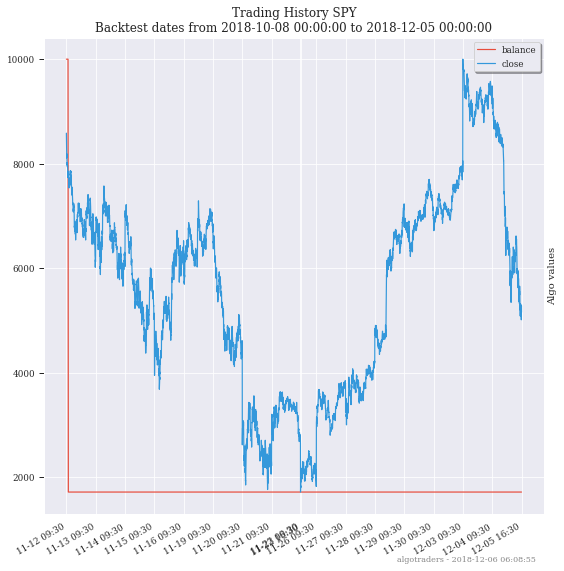

In [6]:
red = 'balance'
blue = 'close'

plot_res = plot_trading_history.plot_trading_history(
    title=title,
    df=history_df,
    red=red,
    blue=blue,
    green=green,
    orange=orange,
    date_col=use_xcol,
    date_format=use_as_date_format,
    xlabel=xlabel,
    ylabel=ylabel,
    df_filter=df_filter,
    show_plot=True,
    dropna_for_all=True)